# Task 3 – Exploratory Analysis (Python)

## 1. Data Understanding & Cleaning
- Load the datasets
- Handle missing values or outliers if necessary

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_events = pd.read_csv('../data/events.csv')
df_devices = pd.read_csv('../data/devices.csv')
df_users = pd.read_csv('../data/users.csv')

In [2]:
df_users

,user_id,signup_date,region,platform
0,739b720a,2023-04-21,United States,iOS
1,0aa3325c,2023-06-12,US,iOS
2,b5a2048e,2023-08-20,KR,Web
3,a4a70166,2023-05-26,can,3rdParty
4,2386e2a0,2023-01-18,USA,Android
...,...,...,...,...
116,cd5c04d0,2023-03-29,US,3rdParty
117,9147a6a3,2023-02-26,can,Web
118,725c73bb,2023-05-24,CA,Web
119,3befc605,2023-01-02,Canada,iOS


In [3]:
df_devices

,device_id,user_id,network,device_type,firmware_version,location
0,d_f4abcb9e,89a25ef6,tuya,fan,1.0.3,Office
1,d_212b804b,2f555493,tuya,smart_plug,1.0.0,NaN
2,d_32b272b3,f41317b2,tuya,heater,3.5.beta,NaN
3,d_f6fe781d,ee413bc3,tuya,fan,3.5.beta,NaN
4,d_8555efd8,cd6e76a2,tuya,smart_bulb,3.5.beta,Home
...,...,...,...,...,...,...
445,d_7e62360f,9bf8d883,ayla,window_sensor,1.0.0,NaN
446,d_aa70926e,76c88cbb,tuya,heater,2.1.0,Office
447,d_c842f77d,33b1ad0b,ayla,door_sensor,1.0.3,Home
448,d_e5776d92,376835df,ayla,legrand_switch,1.0.3,Office


In [4]:
df_events

,event_id,device_id,event_type,event_value,event_ts,payload
0,e_0,d_87cfe321,telemetry,see_payload,2024-01-18T17:45:43.000Z,"{""metadata"": {""oem_model"": ""door_sensor"", ""dsn..."
1,e_1,d_fddd9d33,telemetry,see_payload,2024-02-04T16:18:19.000Z,"{""metadata"": {""oem_model"": ""window_sensor"", ""d..."
2,e_2,d_c5859fb6,telemetry,see_payload,2024-01-12T10:57:04.000Z,"{""status"": [{""code"": ""generic_state"", ""value"":..."
3,e_3,d_de3f2763,telemetry,see_payload,2024-01-02T08:09:18.000Z,"{""status"": [{""code"": ""switch_led"", ""value"": fa..."
4,e_4,d_8406c179,telemetry,see_payload,2024-01-23T01:15:16.000Z,"{""status"": [{""code"": ""generic_state"", ""value"":..."
...,...,...,...,...,...,...
14995,e_14995,d_f4abcb9e,telemetry,see_payload,2024-01-04T08:25:44.000Z,"{""status"": [{""code"": ""generic_state"", ""value"":..."
14996,e_14996,d_8406c179,telemetry,see_payload,2024-02-02T01:57:18.000Z,"{""status"": [{""code"": ""generic_state"", ""value"":..."
14997,e_14997,d_e55d7bd8,telemetry,see_payload,2024-01-19T07:55:57.000Z,"{""status"": [{""code"": ""generic_state"", ""value"":..."
14998,e_14998,d_871a0d7b,telemetry,see_payload,2024-01-23T21:20:26.000Z,"{""status"": [{""code"": ""switch_1"", ""value"": true..."


### data cleaning

In [5]:
# missing value in devices
df_devices.isna().sum()

device_id             0
user_id              25
network               0
device_type           0
firmware_version      0
location            108
dtype: int64

In [6]:
# user_id is critical so remove unknown users
df_devices = df_devices.dropna(subset=['user_id'])

In [7]:
# I am not sure - depend on system analysing - we can replace null locations with "unknown"
df_devices['location'] = df_devices['location'].fillna('Unknown')

C:\Users\mazia\AppData\Local\Temp\ipykernel_8156\1008501725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_devices['location'] = df_devices['location'].fillna('Unknown')


In [8]:
df_devices

,device_id,user_id,network,device_type,firmware_version,location
0,d_f4abcb9e,89a25ef6,tuya,fan,1.0.3,Office
1,d_212b804b,2f555493,tuya,smart_plug,1.0.0,Unknown
2,d_32b272b3,f41317b2,tuya,heater,3.5.beta,Unknown
3,d_f6fe781d,ee413bc3,tuya,fan,3.5.beta,Unknown
4,d_8555efd8,cd6e76a2,tuya,smart_bulb,3.5.beta,Home
...,...,...,...,...,...,...
445,d_7e62360f,9bf8d883,ayla,window_sensor,1.0.0,Unknown
446,d_aa70926e,76c88cbb,tuya,heater,2.1.0,Office
447,d_c842f77d,33b1ad0b,ayla,door_sensor,1.0.3,Home
448,d_e5776d92,376835df,ayla,legrand_switch,1.0.3,Office


In [9]:
# remove duplicate users
df_users = df_users.drop_duplicates(subset=['user_id'], keep='last')   # or 'first'
df_users

,user_id,signup_date,region,platform
1,0aa3325c,2023-06-12,US,iOS
2,b5a2048e,2023-08-20,KR,Web
3,a4a70166,2023-05-26,can,3rdParty
4,2386e2a0,2023-01-18,USA,Android
5,376835df,2023-06-27,USA,Android
...,...,...,...,...
116,cd5c04d0,2023-03-29,US,3rdParty
117,9147a6a3,2023-02-26,can,Web
118,725c73bb,2023-05-24,CA,Web
119,3befc605,2023-01-02,Canada,iOS


In [10]:
# events
# based on my evaluates in Access (simpler and quick query making), 
# there is a 'unusually high' value for one device - events number
events_per_device = (
    df_events.groupby('device_id')
      .size()
      .reset_index(name='event_count')
      .sort_values('event_count', ascending=False)
)

events_per_device.head(5)

,device_id,event_count
430,d_f4abcb9e,1517
303,d_b27b3b90,46
7,d_05655d2b,45
135,d_502f0068,44
220,d_7f6727b5,44


#### Report
- The majority of devices generate around 40–50 events, but device d_f4abcb9e has 1517 events
- This is an "unusually high" events and maybe automated testing, a malfunction device, or data entry error.

## 2. Visualizations
Produce at least 3 meaningful charts, such as:
- Event volume over time
- Events per device or per user
- Comparison between Ayla vs Tuya devices
- Highlight any anomalies or interesting patterns

In [11]:
# Event volume over time

# First we need to convert timestamp to datetime
df_events['event_ts'] = pd.to_datetime(df_events['event_ts'])

# then merge tables events and devices because we need device_type
df = df_events.merge(df_devices, on='device_id', how='left')
# and merge above df with users because we need user info
df = df.merge(df_users, on='user_id', how='left')

df.head(5)

,event_id,device_id,event_type,event_value,event_ts,payload,user_id,network,device_type,firmware_version,location,signup_date,region,platform
0,e_0,d_87cfe321,telemetry,see_payload,2024-01-18 17:45:43+00:00,"{""metadata"": {""oem_model"": ""door_sensor"", ""dsn...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e_1,d_fddd9d33,telemetry,see_payload,2024-02-04 16:18:19+00:00,"{""metadata"": {""oem_model"": ""window_sensor"", ""d...",33b1ad0b,ayla,window_sensor,3.5.beta,Cottage,2023-01-23,CA,Web
2,e_2,d_c5859fb6,telemetry,see_payload,2024-01-12 10:57:04+00:00,"{""status"": [{""code"": ""generic_state"", ""value"":...",2386e2a0,tuya,heater,2.1.0,Cottage,2023-01-18,USA,Android
3,e_3,d_de3f2763,telemetry,see_payload,2024-01-02 08:09:18+00:00,"{""status"": [{""code"": ""switch_led"", ""value"": fa...",1bc42251,tuya,smart_bulb,1.0.0,Cottage,2023-03-03,Canada,Web
4,e_4,d_8406c179,telemetry,see_payload,2024-01-23 01:15:16+00:00,"{""status"": [{""code"": ""generic_state"", ""value"":...",5d06a59a,tuya,heater,3.5.beta,Home,2023-12-28,can,Android


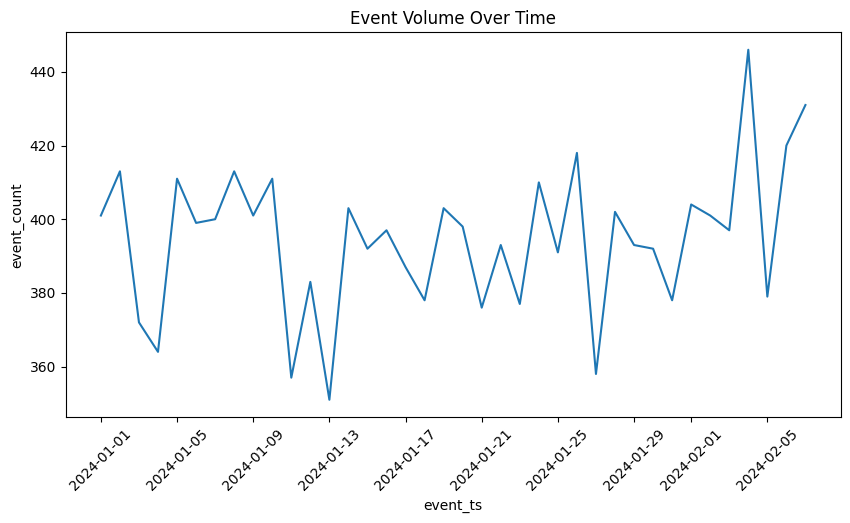

In [12]:
# Event Volume Over Time
events_per_day = (
    df.groupby(df['event_ts'].dt.date)   # extract date from date-time and group by applys
      .size()                            # like count() - counts how many rows (events) are in each group (date)
      .reset_index(name='event_count')   # prepare index for y_axe
)

# drawing
plt.figure(figsize=(10,5))
sns.lineplot(data=events_per_day, x='event_ts', y='event_count')
plt.title('Event Volume Over Time')
plt.xticks(rotation=45)
plt.show()

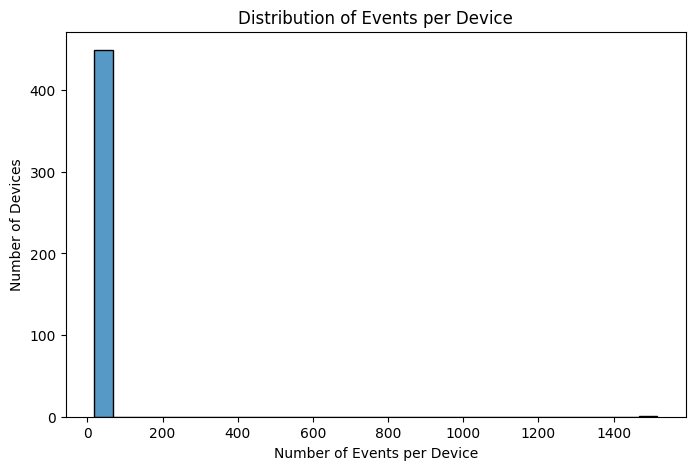

In [13]:
# Events per Device
events_per_device = (
    df.groupby('device_id')  # group by device_id
      .size()                # count events (rows) in each group (device)
      .reset_index(name='event_count')  # index for Y
      .sort_values('event_count', ascending=False)  # sort a-z
)

# draw
plt.figure(figsize=(8,5))
sns.histplot(events_per_device['event_count'], bins=30)
plt.title('Distribution of Events per Device')
plt.xlabel('Number of Events per Device')
plt.ylabel('Number of Devices')
plt.show()

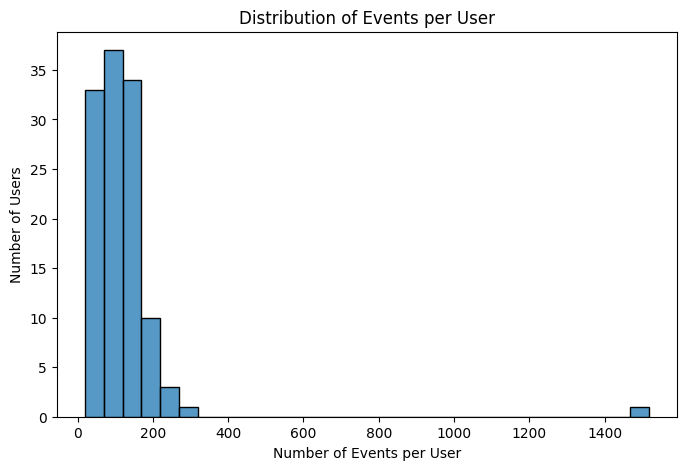

In [14]:
# Events per User
events_per_user = (
    df.groupby('user_id')
      .size()
      .reset_index(name='event_count')
      .sort_values('event_count', ascending=False)
)

# events_per_user.head()

plt.figure(figsize=(8,5))
sns.histplot(events_per_user['event_count'], bins=30)
plt.title('Distribution of Events per User')
plt.xlabel('Number of Events per User')
plt.ylabel('Number of Users')
plt.show()


In [15]:
# Comparison between Ayla vs Tuya devices.

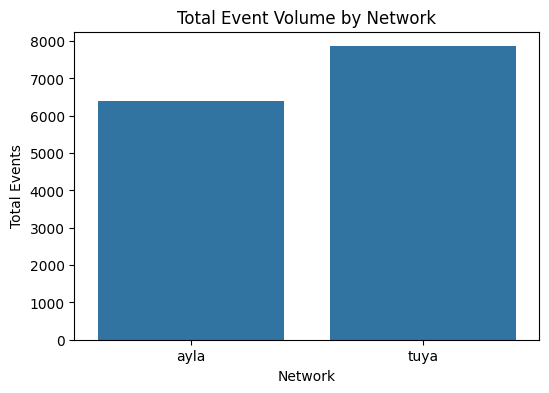

In [16]:
# Total events by networks
events_by_network = (
    df.groupby('network')
      .size()
      .reset_index(name='event_count')
)

plt.figure(figsize=(6,4))
sns.barplot(data=events_by_network, x='network', y='event_count')

plt.title('Total Event Volume by Network')
plt.xlabel('Network')
plt.ylabel('Total Events')
plt.show()


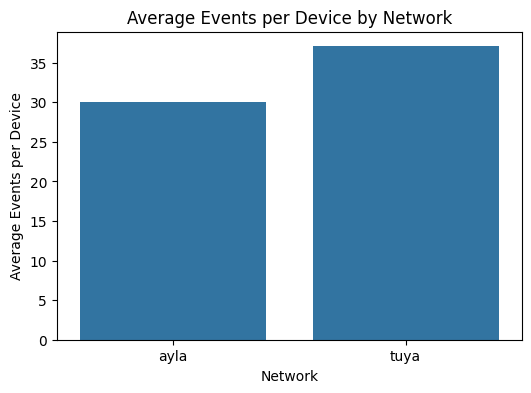

In [17]:
# average events per device by network
avg_events_per_device = (
    df.groupby(['network', 'device_id'])
      .size()
      .reset_index(name='event_count')
      .groupby('network')['event_count'].mean()
      .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(data=avg_events_per_device, x='network', y='event_count')

plt.title('Average Events per Device by Network')
plt.xlabel('Network')
plt.ylabel('Average Events per Device')
plt.show()


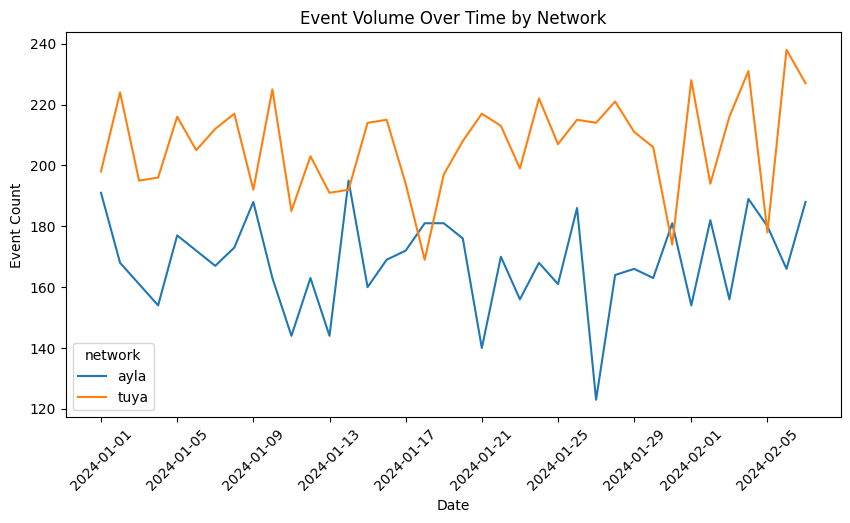

In [18]:
# events over date by network
events_time_network = (
    df.groupby([df['event_ts'].dt.date, 'network'])
      .size()
      .reset_index(name='event_count')
)

plt.figure(figsize=(10,5))
sns.lineplot(
    data=events_time_network,
    x='event_ts',
    y='event_count',
    hue='network'
)

plt.title('Event Volume Over Time by Network')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.show()

# Task 4 – Hypotheses & Questions

1. Propose 2–3 hypotheses about user or device behavior.
2. Show how you would test each hypothesis with the available data.
3. Clearly state whether the data supports, partially supports, or does not support the hypothesis.

In [19]:
# Your code for hypothesis testing here

# Task 5 – Reflection

- What additional data would improve this analysis?
- What limitations prevent deeper insights?
- What would you explore next if this were Phase 0 of a larger project?

*Write your reflection here...*